Projeto Final TCC de Ciênci de Dados

1) https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol?search=Futebol


1 ) Verificar quantidade de Vitorias/Derrotas/Empate do Clube (Botafogo, Vasco, Fluminense, Flamengo)
Exemplo: Quantidade de Vitorias ANO
Exemplo: Quantidade de Derrotas ANO
Exemplo: Quantidade de Empates ANO

2) Quais os Clubes são os Carrascos ( Qual Clube Adversario que mais ganhou do Clube Analisado , pode ser Média)

3) Quantidade de Gols Por Ano

4) Quantidade de Gols Sofrido por ano

5) Qual Clube Adversario tomou mais gol do clube analisado ( Pode ser por média Jogos x gols)

6) Total Geral de Média de Gols por ano, Média de Partidas vencidas por ano, Média de Partidas perdidas por ano e média de partidas empatadas por ano.



# Possibilidades
https://dadosabertos.camara.leg.br/swagger/api.html#api


In [123]:
#Instala Bibliotecas necessárias
#!pip install pandas
#!pip install numpy
#!pip install matplotlib

In [124]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot

In [125]:
#leitura do arquivo  csv do campeonato brasileiro
df = pd.read_csv('dados/campeonato-brasileiro-full.csv', sep=',',encoding = "UTF-8")
df.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [126]:
#Fornece informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8025 non-null   int64 
 1   rodata              8025 non-null   int64 
 2   data                8025 non-null   object
 3   hora                8025 non-null   object
 4   mandante            8025 non-null   object
 5   visitante           8025 non-null   object
 6   formacao_mandante   3051 non-null   object
 7   formacao_visitante  3051 non-null   object
 8   tecnico_mandante    3415 non-null   object
 9   tecnico_visitante   3415 non-null   object
 10  vencedor            8025 non-null   object
 11  arena               8025 non-null   object
 12  mandante_Placar     8025 non-null   int64 
 13  visitante_Placar    8025 non-null   int64 
 14  mandante_Estado     8025 non-null   object
 15  visitante_Estado    8025 non-null   object
dtypes: int64(4), object(12)


In [127]:
df.columns = ["ID","rodada","data","hora","mandante","visitante","formacao_mandante","formacao_visitante","tecnico_mandante","tecnico_visitante","vencedor","arena","mandante_Placar","visitante_Placar","mandante_Estado","visitante_Estado"]

In [128]:
#Converte a data do tipo objeto para o tipo datetime e cria a coluna ano
df["data"] = pd.to_datetime(df["data"],format='%d/%m/%Y',dayfirst=True)
df_2007_2022 = df
df_2007_2022["ano"] = df_2007_2022["data"].dt.year

# Analise será feita do ano de 2007 até 2022
df_2007_2022 = df_2007_2022[(df_2007_2022["ano"]>=2007)]
df_2007_2022

#indexa dataFrame
df_2007_2022.set_index('data')
df_2007_2022.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6079 entries, 1946 to 8024
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  6079 non-null   int64         
 1   rodada              6079 non-null   int64         
 2   data                6079 non-null   datetime64[ns]
 3   hora                6079 non-null   object        
 4   mandante            6079 non-null   object        
 5   visitante           6079 non-null   object        
 6   formacao_mandante   3051 non-null   object        
 7   formacao_visitante  3051 non-null   object        
 8   tecnico_mandante    3415 non-null   object        
 9   tecnico_visitante   3415 non-null   object        
 10  vencedor            6079 non-null   object        
 11  arena               6079 non-null   object        
 12  mandante_Placar     6079 non-null   int64         
 13  visitante_Placar    6079 non-null   int64    

In [129]:
# Cria a coluna vencedor_mandante_visitante_empate com os resultados 1 = Vencedor Mandante, 2 = Vencedor Visitante, 3 = Empate
df_2007_2022.loc[(df_2007_2022['vencedor'] == df_2007_2022['mandante']),'vencedor_mandante_visitante_empate']=1
df_2007_2022.loc[(df_2007_2022['vencedor'] == df_2007_2022['visitante']),'vencedor_mandante_visitante_empate']=2
df_2007_2022.loc[(df_2007_2022['vencedor'] == '-'),'vencedor_mandante_visitante_empate']=3

df_2007_2022.head()



C:\Users\vande\AppData\Local\Temp\ipykernel_16864\2674450419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2007_2022.loc[(df_2007_2022['vencedor'] == df_2007_2022['mandante']),'vencedor_mandante_visitante_empate']=1


,ID,rodada,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,ano,vencedor_mandante_visitante_empate
1946,1947,1,2007-05-12,18:10,Figueirense,Athletico-PR,NaN,NaN,NaN,NaN,Athletico-PR,Orlando Scarpelli,3,6,SC,PR,2007,2.0
1947,1948,1,2007-05-12,18:10,Sao Paulo,Goias,NaN,NaN,NaN,NaN,Sao Paulo,Morumbi,2,0,SP,GO,2007,1.0
1948,1949,1,2007-05-12,18:10,Fluminense,Cruzeiro,NaN,NaN,NaN,NaN,-,Maracanã,2,2,RJ,MG,2007,3.0
1949,1950,1,2007-05-13,16:00,Flamengo,Palmeiras,NaN,NaN,NaN,NaN,Palmeiras,Maracanã,2,4,RJ,SP,2007,2.0
1950,1951,1,2007-05-13,16:00,Internacional,Botafogo-RJ,NaN,NaN,NaN,NaN,Botafogo-RJ,Beira Rio,2,3,RS,RJ,2007,2.0


In [130]:
# Criar coluna total de gols
df_2007_2022 = df_2007_2022.eval('total_gols = mandante_Placar + visitante_Placar ')

df_2007_2022.head()

,ID,rodada,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,ano,vencedor_mandante_visitante_empate,total_gols
1946,1947,1,2007-05-12,18:10,Figueirense,Athletico-PR,NaN,NaN,NaN,NaN,Athletico-PR,Orlando Scarpelli,3,6,SC,PR,2007,2.0,9
1947,1948,1,2007-05-12,18:10,Sao Paulo,Goias,NaN,NaN,NaN,NaN,Sao Paulo,Morumbi,2,0,SP,GO,2007,1.0,2
1948,1949,1,2007-05-12,18:10,Fluminense,Cruzeiro,NaN,NaN,NaN,NaN,-,Maracanã,2,2,RJ,MG,2007,3.0,4
1949,1950,1,2007-05-13,16:00,Flamengo,Palmeiras,NaN,NaN,NaN,NaN,Palmeiras,Maracanã,2,4,RJ,SP,2007,2.0,6
1950,1951,1,2007-05-13,16:00,Internacional,Botafogo-RJ,NaN,NaN,NaN,NaN,Botafogo-RJ,Beira Rio,2,3,RS,RJ,2007,2.0,5


In [131]:
# Verifica a quantidade de temporadas por time levando em consideração que a temporada 2020 e 2021 foi atipica por causa da COVID-19
#temporada 2020
#começou = 08/08/2020
#terminou = 25/02/2021

#temporada 2021
#começou = 29/05/2021
#terminou = 09/12/2021

df_2007_2022["temporada"] = df["ano"]
df_2007_2022.loc[(df_2007_2022["data"]>="08/08/2020") & (df_2007_2022["data"]<="25/02/2021"),"temporada" ] = 2020

df_2007_2022.loc[(df_2007_2022["data"]>="29/05/2021") & (df_2007_2022["data"]<="09/12/2021"),"temporada" ] = 2021


C:\Users\vande\AppData\Local\Temp\ipykernel_16864\3196754707.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_2007_2022.loc[(df_2007_2022["data"]>="08/08/2020") & (df_2007_2022["data"]<="25/02/2021"),"temporada" ] = 2020
C:\Users\vande\AppData\Local\Temp\ipykernel_16864\3196754707.py:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_2007_2022.loc[(df_2007_2022["data"]>="29/05/2021") & (df_2007_2022["data"]<="09/12/2021"),"temporada" ] = 2021


In [132]:
df_2007_2022[(df_2007_2022["temporada"]==2021)]

,ID,rodada,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,ano,vencedor_mandante_visitante_empate,total_gols,temporada
7265,7266,1,2021-05-29,19:00,Cuiaba,Juventude,4-3-3,4-2-3-1,A. Valentim do Carmo Neto,E. de Barros,-,Arena Pantanal,2,2,MT,RS,2021,3.0,4,2021
7266,7267,1,2021-05-29,20:00,Bahia,Santos,4-3-3,4-3-3,L. Cavalcanti,F. Diniz Silva,Bahia,Estádio de Pituaçu,3,0,BA,SP,2021,1.0,3,2021
7267,7268,1,2021-05-29,21:00,Sao Paulo,Fluminense,3-5-2,4-2-3-1,H. Crespo,R. Machado Marques,-,Morumbi,0,0,SP,RJ,2021,3.0,0,2021
7268,7269,1,2021-05-30,11:01,Atletico-MG,Fortaleza,4-2-3-1,3-5-2,A. Stival,J. Vojvoda,Fortaleza,Mineirão,1,2,MG,CE,2021,2.0,3,2021
7269,7270,1,2021-05-30,16:00,Flamengo,Palmeiras,4-2-3-1,3-5-2,R. Ceni,A. Moreira Ferreira,Flamengo,Maracanã,1,0,RJ,SP,2021,1.0,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7640,7641,38,2021-12-09,21:33,Bragantino,Internacional,4-2-3-1,3-4-2-1,M. Nogueira Barbieri,D. Aguirre Camblor,Bragantino,Nabizão,1,0,SP,RS,2021,1.0,1,2021
7641,7642,38,2021-12-09,21:30,Sport,Athletico-PR,4-2-3-1,3-4-2-1,G. Florentín,J. Freitas,-,Arena de Pernambuco,1,1,PE,PR,2021,3.0,2,2021
7642,7643,38,2021-12-09,21:33,Juventude,Corinthians,3-4-3,4-3-3,J. Ribeiro Ventura,S. Campos Junior,Juventude,Alfredo Jaconi,1,0,RS,SP,2021,1.0,1,2021
7643,7644,38,2021-12-09,21:33,Gremio,Atletico-MG,4-2-3-1,4-2-3-1,V. Carmo Mancini,A. Stival,Gremio,Arena do Grêmio,4,3,RS,MG,2021,1.0,7,2021


In [133]:
# Quantifica a quantidade de Vitorias de todas as temporadas analisadas

qtd_vitorias_todas_temporadas = df["vencedor"].value_counts(sort=True).rename_axis('Times').reset_index(name='Vitorias')
qtd_vitorias_todas_temporadas.head(10)

,Times,Vitorias
0,-,2123
1,Sao Paulo,351
2,Flamengo,335
3,Santos,329
4,Internacional,324
5,Corinthians,314
6,Palmeiras,309
7,Atletico-MG,308
8,Fluminense,306
9,Gremio,295


1 ) Verificar quantidade de Vitorias/Derrotas/Empate do Clube (Botafogo, Vasco, Fluminense, Flamengo)


In [134]:
#Criação de data frame relacionado ao BOTAFOGO
selecao = (df['mandante'] == 'Botafogo-RJ' ) |  (df['visitante'] == 'Botafogo-RJ' )

df_BRF = df[selecao]

df_BRF.head(10)




,ID,rodada,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,ano
552,553,1,2004-04-21,16:00,Botafogo-RJ,Goias,NaN,NaN,NaN,NaN,Goias,Caio Martins,1,4,RJ,GO,2004
575,576,2,2004-04-25,18:00,Santos,Botafogo-RJ,NaN,NaN,NaN,NaN,Santos,Vila Belmiro,2,0,SP,RJ,2004
576,577,3,2004-04-28,20:30,Botafogo-RJ,Atletico-MG,NaN,NaN,NaN,NaN,-,Caio Martins,2,2,RJ,MG,2004
588,590,4,2004-05-01,16:00,Criciuma,Botafogo-RJ,NaN,NaN,NaN,NaN,Criciuma,Heriberto Hulse,1,0,SC,RJ,2004
607,609,5,2004-05-09,16:00,Botafogo-RJ,Paysandu,NaN,NaN,NaN,NaN,-,Caio Martins,2,2,RJ,PA,2004
619,621,6,2004-05-16,18:00,Gremio,Botafogo-RJ,NaN,NaN,NaN,NaN,-,Olímpico,2,2,RS,RJ,2004
623,625,7,2004-05-22,16:00,Botafogo-RJ,Figueirense,NaN,NaN,NaN,NaN,-,Caio Martins,1,1,RJ,SC,2004
641,643,8,2004-05-30,16:00,Vasco,Botafogo-RJ,NaN,NaN,NaN,NaN,Vasco,Maracanã,4,0,RJ,RJ,2004
648,650,9,2004-06-12,16:00,Parana,Botafogo-RJ,NaN,NaN,NaN,NaN,-,Pinheirão,1,1,PR,RJ,2004
665,667,10,2004-06-20,16:00,Botafogo-RJ,Ponte Preta,NaN,NaN,NaN,NaN,Ponte Preta,Caio Martins,0,1,RJ,SP,2004


In [135]:
df_BRF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 552 to 8016
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  658 non-null    int64         
 1   rodada              658 non-null    int64         
 2   data                658 non-null    datetime64[ns]
 3   hora                658 non-null    object        
 4   mandante            658 non-null    object        
 5   visitante           658 non-null    object        
 6   formacao_mandante   228 non-null    object        
 7   formacao_visitante  228 non-null    object        
 8   tecnico_mandante    266 non-null    object        
 9   tecnico_visitante   265 non-null    object        
 10  vencedor            658 non-null    object        
 11  arena               658 non-null    object        
 12  mandante_Placar     658 non-null    int64         
 13  visitante_Placar    658 non-null    int64      

In [136]:
brf_mandante = df_BRF[(df_BRF["mandante"] == "Botafogo-RJ")]


brf_mandante['vencedor'].value_counts()



Botafogo-RJ      151
-                 89
Internacional      8
Flamengo           7
Palmeiras          7
Sao Paulo          6
Santos             5
Gremio             5
Corinthians        5
Figueirense        5
Fluminense         5
Athletico-PR       5
Bahia              4
Goias              4
Cruzeiro           3
Atletico-MG        3
Ponte Preta        3
Vitoria            2
Avai               2
Atletico-GO        2
Vasco              1
Fortaleza          1
Sport              1
Bragantino         1
Portuguesa         1
Chapecoense        1
Santo Andre        1
Juventude          1
Cuiaba             1
Name: vencedor, dtype: int64

In [137]:
#alterei 
brf_mandante.loc[brf_mandante["vencedor"] == "-","vencedor"] = 'empate'
brf_mandante.loc[(brf_mandante["vencedor"]!= "Botafogo-RJ") & (brf_mandante["vencedor"] != "empate"),"vencedor"] = 'adversario'


<Axes: >

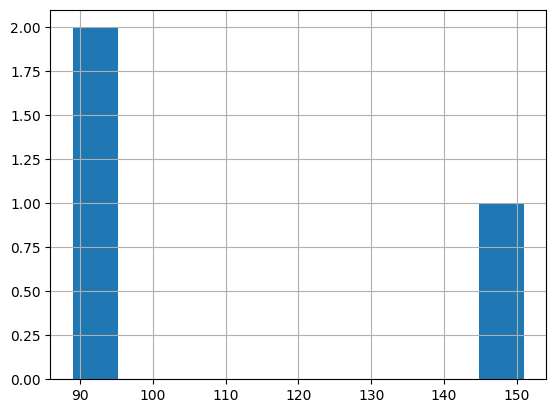

In [138]:
brf_mandante['vencedor'].value_counts().hist()

In [139]:
df_BRF.info()
df_BRF['year'].value_counts().sort_index()

#df_BRF['vencedor_mandante_visitante_empate'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 552 to 8016
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  658 non-null    int64         
 1   rodada              658 non-null    int64         
 2   data                658 non-null    datetime64[ns]
 3   hora                658 non-null    object        
 4   mandante            658 non-null    object        
 5   visitante           658 non-null    object        
 6   formacao_mandante   228 non-null    object        
 7   formacao_visitante  228 non-null    object        
 8   tecnico_mandante    266 non-null    object        
 9   tecnico_visitante   265 non-null    object        
 10  vencedor            658 non-null    object        
 11  arena               658 non-null    object        
 12  mandante_Placar     658 non-null    int64         
 13  visitante_Placar    658 non-null    int64      

KeyError: 'year'

In [ ]:
#Verificar se os dados tem relacionamento e quais são.

df_estatisticas = pd.read_csv('dados/campeonato-brasileiro-estatisticas-full.csv', sep=',',encoding = "UTF-8")
df_estatisticas[(df_estatisticas["partida_id"]==4607)].head()

In [ ]:
#Filtro
#tt = df[df["ID"]==4607]

In [ ]:
#df.set_index('ID')
#df['Data']= pd.to_datetime(df['Data'])
#df['ano'] = df['Data'].dt.year
#df.reset_index()


df["vencedor"].value_counts()
#arenas = df2[['arena', 'tgols']].groupby('arena')